In [1]:
import torch
import torchvision.models as models

from Helper_funcs import *

In [2]:
model = models.mobilenet_v3_large(weights='DEFAULT')
model_aug = models.mobilenet_v3_large(weights='DEFAULT')
model_name = 'Mobilenet'
input_size = 224

In [3]:
# Load dataset, replace classifier, and display the model architecture
train_loader, val_loader, test_loader = load_dataset(input_size, False)
replace_classifier(model, model_name)
display_model(model, input_size)

Input size = (3, 224, 224)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 112, 112]             432
       BatchNorm2d-2         [-1, 16, 112, 112]              32
         Hardswish-3         [-1, 16, 112, 112]               0
            Conv2d-4         [-1, 16, 112, 112]             144
       BatchNorm2d-5         [-1, 16, 112, 112]              32
              ReLU-6         [-1, 16, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             256
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 64, 112, 112]           1,024
      BatchNorm2d-11         [-1, 64, 112, 112]             128
             ReLU-12         [-1, 64, 112, 112]               0
           Conv2d-13           [-1, 64, 56, 56]             576
      BatchN

In [4]:
# train the model
train(model, train_loader, val_loader, ('./models/best_' + model_name + '.pth'))

Using: [cuda] - [NVIDIA GeForce RTX 3080]
Saving the model with validation accuracy: 0.9990
Epoch [1/30], Training Loss: 0.0378 - Validation Loss: 0.0045 - Validation Accuracy: 0.9990
Epoch [2/30], Training Loss: 0.0095 - Validation Loss: 0.0037 - Validation Accuracy: 0.9988
Saving the model with validation accuracy: 0.9992
Epoch [3/30], Training Loss: 0.0068 - Validation Loss: 0.0023 - Validation Accuracy: 0.9992
Saving the model with validation accuracy: 0.9994
Epoch [4/30], Training Loss: 0.0065 - Validation Loss: 0.0020 - Validation Accuracy: 0.9994
Epoch [5/30], Training Loss: 0.0066 - Validation Loss: 0.0026 - Validation Accuracy: 0.9991
Epoch [6/30], Training Loss: 0.0079 - Validation Loss: 0.0020 - Validation Accuracy: 0.9991
Epoch [7/30], Training Loss: 0.0065 - Validation Loss: 0.0027 - Validation Accuracy: 0.9992
Epoch [8/30], Training Loss: 0.0072 - Validation Loss: 0.0020 - Validation Accuracy: 0.9994
Epoch [9/30], Training Loss: 0.0056 - Validation Loss: 0.0029 - Validati

In [5]:
# Load the best preforming model, test classification time and overall accuracy
load_model(model, './models/best_' + model_name + '.pth')
evaluate_time(model)
evaluate_accuracy(model, test_loader)

Predicted class: testing-a, Actual label: testing-a, time: 0.0371
Predicted class: testing-a, Actual label: testing-a, time: 0.0077
Predicted class: testing-b, Actual label: testing-b, time: 0.0068
Predicted class: testing-b, Actual label: testing-b, time: 0.0072
Predicted class: testing-c, Actual label: testing-c, time: 0.0067
Predicted class: testing-c, Actual label: testing-c, time: 0.0067
Predicted class: testing-d, Actual label: testing-d, time: 0.0063
Predicted class: testing-d, Actual label: testing-d, time: 0.0074
Predicted class: testing-e, Actual label: testing-e, time: 0.0075
Predicted class: testing-e, Actual label: testing-e, time: 0.0074
Predicted class: testing-b, Actual label: testing-f, time: 0.0077
Predicted class: testing-c, Actual label: testing-f, time: 0.0070
Average time for prediction: 0.0096 seconds
Overall test accuracy: 96.23%


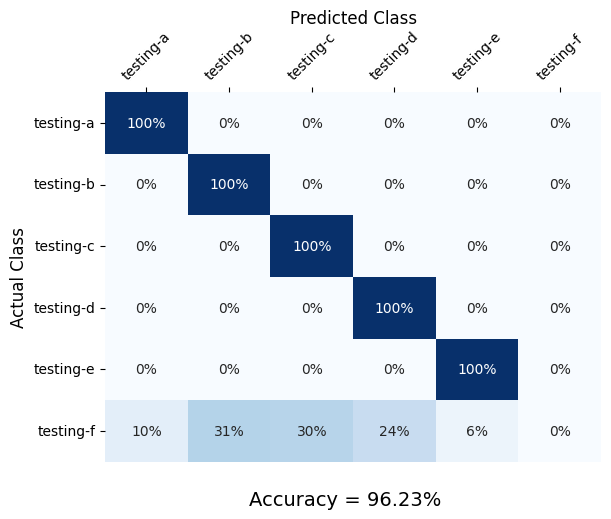

In [6]:
# Print a confusion matrix of predicted vs actual class labels
create_confusion_matrix(model, test_loader)

In [7]:
# Create another model with the augmented dataset
train_loader_aug, val_loader_aug, test_loader_aug = load_dataset(input_size, True)
replace_classifier(model_aug, model_name)

In [8]:
# train the model
train(model_aug, train_loader_aug, val_loader_aug, ('./models/best_' + model_name + '_augmented.pth'))

Using: [cuda] - [NVIDIA GeForce RTX 3080]
Saving the model with validation accuracy: 0.9382
Epoch [1/30], Training Loss: 0.3619 - Validation Loss: 0.2009 - Validation Accuracy: 0.9382
Saving the model with validation accuracy: 0.9458
Epoch [2/30], Training Loss: 0.1667 - Validation Loss: 0.1571 - Validation Accuracy: 0.9458
Saving the model with validation accuracy: 0.9487
Epoch [3/30], Training Loss: 0.1376 - Validation Loss: 0.1500 - Validation Accuracy: 0.9487
Saving the model with validation accuracy: 0.9538
Epoch [4/30], Training Loss: 0.1259 - Validation Loss: 0.1282 - Validation Accuracy: 0.9538
Epoch [5/30], Training Loss: 0.1174 - Validation Loss: 0.1282 - Validation Accuracy: 0.9521
Saving the model with validation accuracy: 0.9586
Epoch [6/30], Training Loss: 0.1124 - Validation Loss: 0.1181 - Validation Accuracy: 0.9586
Saving the model with validation accuracy: 0.9626
Epoch [7/30], Training Loss: 0.1064 - Validation Loss: 0.1066 - Validation Accuracy: 0.9626
Saving the mod

In [9]:
# Test the accuracy of the model with augmented data
load_model(model_aug, './models/best_' + model_name + '_augmented.pth')
evaluate_accuracy(model_aug, test_loader_aug)

Overall test accuracy: 97.45%


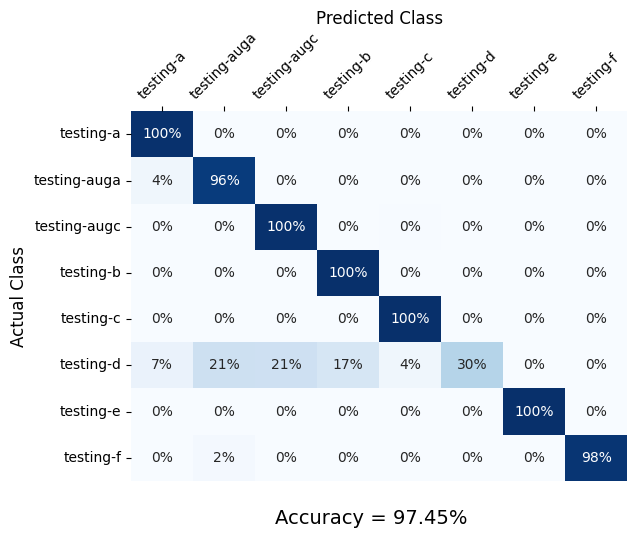

In [10]:
# Print a confusion matrix of predicted vs actual class labels
create_confusion_matrix(model_aug, test_loader_aug)